# Understanding how our models behave

In [1]:
import numpy as np
from city import City

philly = City(name="Philadelphia", pop=60000, temp=70, ue_rate=0.10, gas=3.00)


gas_deviations =[]
for i in range(10000):
    philly = City(name="Philadelphia", pop=60000, temp=70, ue_rate=0.10, gas=3.00)
    for i in range(1000):
        philly.update_gas_prices()

    change = (philly.gas_prices - philly.base_gas_prices) / philly.base_gas_prices * 100
    
    gas_deviations.append(change)

print(np.mean(gas_deviations))

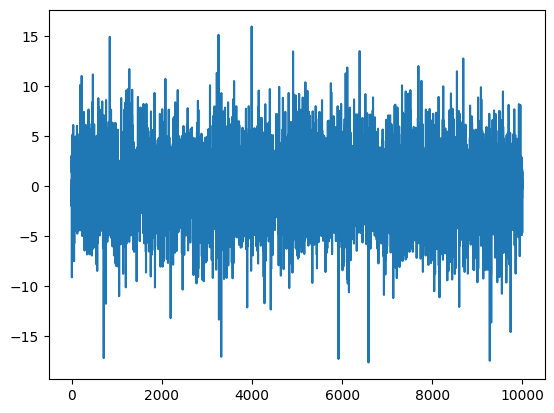

In [ ]:
import matplotlib.pyplot as plt
plt.plot(gas_deviations)

In [ ]:
import numpy as np
from city import City

temp_deviations =[]
for i in range(10000):
    philly = City(name="Philadelphia", pop=60000, temp=70, ue_rate=0.10, gas=3.00)
    for i in range(1000):
        philly.update_temp()

    change = (philly.temp - philly.base_temp) / philly.base_temp * 100
    
    temp_deviations.append(change)

print(np.mean(temp_deviations))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(temp_deviations)

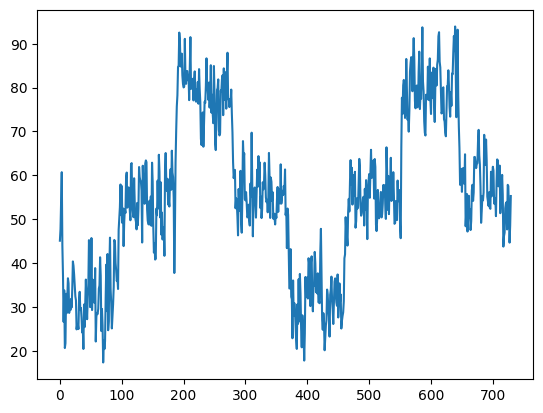

In [ ]:
from env import Env
from city import City
import random
import matplotlib.pyplot as plt
import math
import trip
import datetime


philly = City(name="Philadelphia", pop=60000, temp=40, ue_rate=0.10, gas=3.00)

env = Env()
env.add_city(philly)

temps=[]

for i in range(730):
    env.date += datetime.timedelta(days=1)
    env.update_temp()
    temps.append(philly.temp)




plt.plot(temps)    

In [1]:
from env import Env
from city import City
from trip import Trip
philadelphia = City("Philadelphia", 1527886, temp=70, ue_rate=0.1, gas=3.5)
nyc = City("New York City", 7888121, temp=67, ue_rate=0.05, gas=5)
washington = City("Washington DC", 631693, temp=72, ue_rate=0.07, gas=4)
baltimore = City("Baltimore", 563455, temp=69, ue_rate=0.024, gas=3.37)
boston = City("Boston", 654776, temp=50, ue_rate=0.006, gas=5)
distances = {
    "Baltimore": {
        "Washington DC": 41,
        "Philadelphia": 106,
        "Boston": 404,
        "New York City": 191,
    },
    "Washington DC": {
        "Baltimore": 41,
        "Philadelphia": 142,
        "Boston": 443,
        "New York City": 229,
    },
    "Philadelphia": {
        "Baltimore": 106,
        "Washington DC": 142,
        "Boston": 308,
        "New York City": 97,
    },
    "Boston": {
        "Baltimore": 404,
        "Washington DC": 443,
        "Philadelphia": 308,
        "New York City": 215,  # This value is based on an average of common distances found online.
    },
    "New York City": {
        "Baltimore": 191,
        "Washington DC": 229,
        "Philadelphia": 97,
        "Boston": 215,
    },
}



e = Env()
t = Trip(boston, washington)
    
e.upcoming_trips.append(t)

for i in range(100):
    e.step()
    print(t.calculate_demand)


<bound method Trip.calculate_demand of <trip.Trip object at 0x7fc800fcdf40>>
-120.22666666666666
-112.06888888888889
-140.62333333333333
-136.27333333333334
-94.0011111111111
-94.0011111111111
-88.59527777777777
-139.75333333333333
-120.1986111111111
-100.90083333333334
-139.75333333333333
-112.06888888888889
-118.13083333333333
-94.0011111111111
-94.0011111111111
-120.22666666666666
-146.15055555555557
-132.06722222222223
-118.13083333333333
-120.07916666666667
-145.45583333333335
-120.1986111111111
-134.26166666666666
-118.13083333333333
-88.59527777777777
-88.47222222222223
<bound method Trip.calculate_demand of <trip.Trip object at 0x7fc800fcdf40>>
-94.0011111111111
-94.0011111111111
-120.14111111111112
-146.15055555555557
-132.06722222222223
-118.13083333333333
-120.07916666666667
-145.46722222222223
-120.1986111111111
-134.3011111111111
-118.13083333333333
-88.59527777777777
-88.47222222222223
<bound method Trip.calculate_demand of <trip.Trip object at 0x7fc800fcdf40>>
-123.41916

In [ ]:
cities= [philadelphia = City("Philadelphia", 1527886, temp=70, ue_rate=0.1, gas=3.5),
nyc = City("New York City", 7888121, temp=67, ue_rate=0.05, gas=5),
washington = City("Washington DC", 631693, temp=72, ue_rate=0.07, gas=4),
baltimore = City("Baltimore", 563455, temp=69, ue_rate=0.024, gas=3.37)]

e = Env()